In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"C:\Users\NEHA GUPTA\OneDrive\Documents\Learning\POWER BI\Sample Superstore.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Paper,Small Box,Xerox 1968,0.37,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Small Pack,Acme® Preferred Stainless Steel Scissors,0.56,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,Telephones and Communication,Small Box,V70,0.59,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [5]:
df.shape

(9426, 24)

In [6]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [7]:
#using mean to fill the null value in Product Base Margin
df['Product Base Margin'].fillna(df['Product Base Margin'].mean(), inplace=True)

# Order Priority

In [8]:
df['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [9]:
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [10]:
df['Order Priority'] = df['Order Priority'].replace('Critical ', 'Critical')

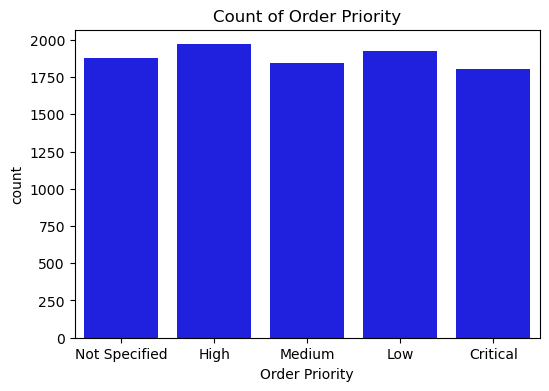

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x ='Order Priority', data=df, color='blue')
plt.title('Count of Order Priority')
plt.show()

In [12]:
'''
df['Order Priority'].replace('Critical ', 'Critical', inplace= True)
sns.countplot(x ='Order Priority', data=df)
plt.show()

'''

"\ndf['Order Priority'].replace('Critical ', 'Critical', inplace= True)\nsns.countplot(x ='Order Priority', data=df)\nplt.show()\n\n"

# Ship Mode	

In [13]:
df['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [14]:
x = df['Ship Mode'].value_counts().index
y = df['Ship Mode'].value_counts().values

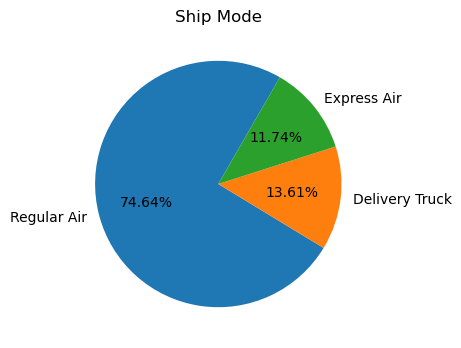

In [15]:
plt.figure(figsize=(5,4))
plt.pie(y, labels=x, autopct='%0.2f%%', startangle=60)
plt.title('Ship Mode')
plt.show()

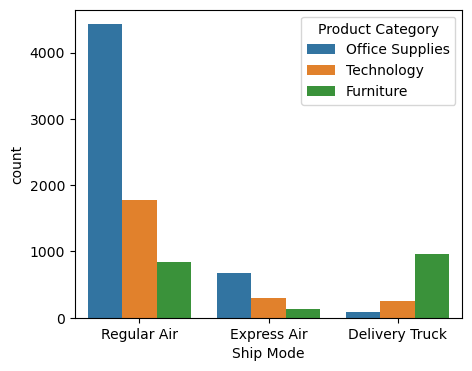

In [16]:
plt.figure(figsize=(5,4))
sns.countplot(x='Ship Mode', data = df, hue = 'Product Category')
plt.show()

# Customer Segment

<function matplotlib.pyplot.show(close=None, block=None)>

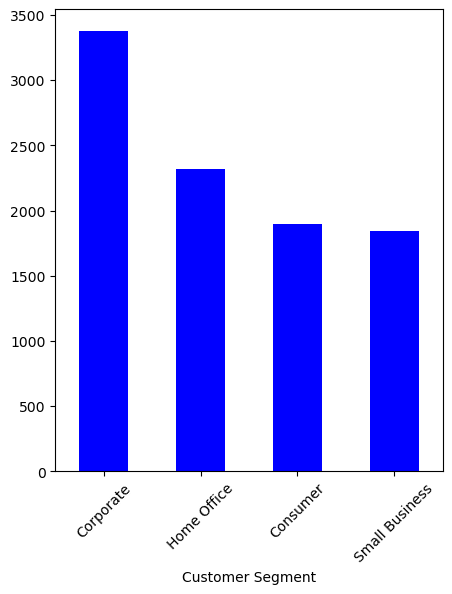

In [17]:
plt.figure(figsize= (5,6))
df['Customer Segment'].value_counts().plot(kind = 'bar', color = 'blue')
plt.xticks(rotation = 45)
plt.show

# Product Category

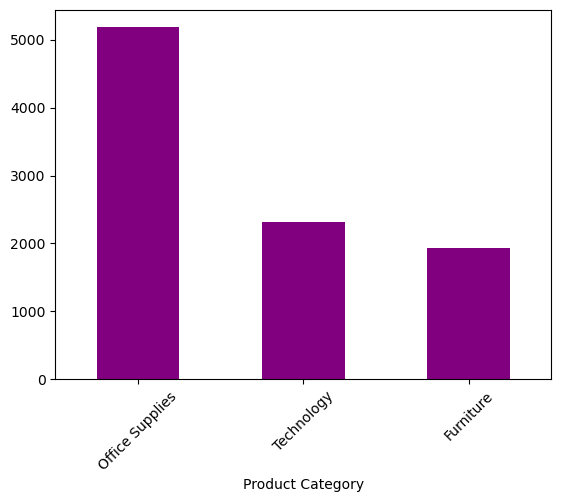

In [18]:
plt.figure(figure=(7,6))
df['Product Category'].value_counts().plot(kind = 'bar', color = 'purple')
plt.xticks(rotation = 45)
plt.show()

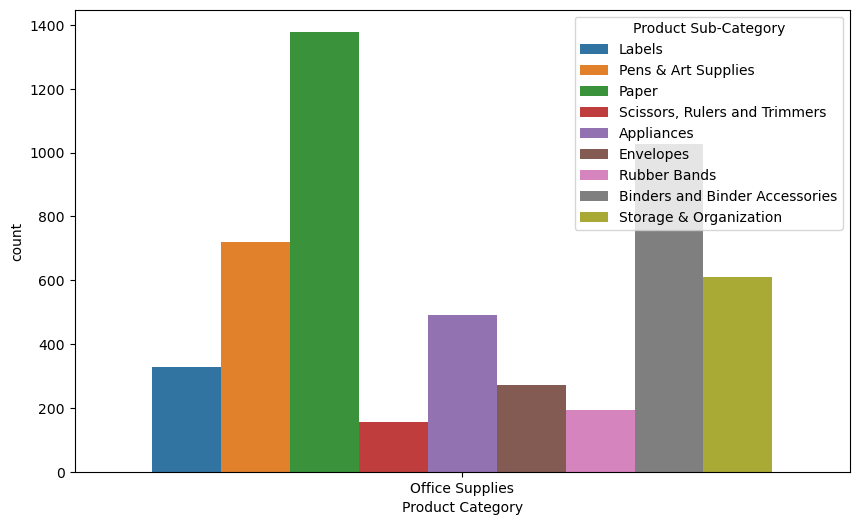

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category', hue = 'Product Sub-Category', data = df[df['Product Category'] == 'Office Supplies'])
plt.show()

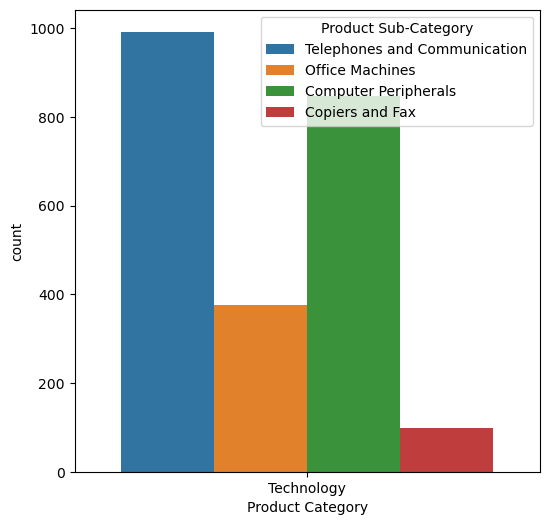

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='Product Category', hue = 'Product Sub-Category', data = df[df['Product Category'] == 'Technology'])
plt.show()

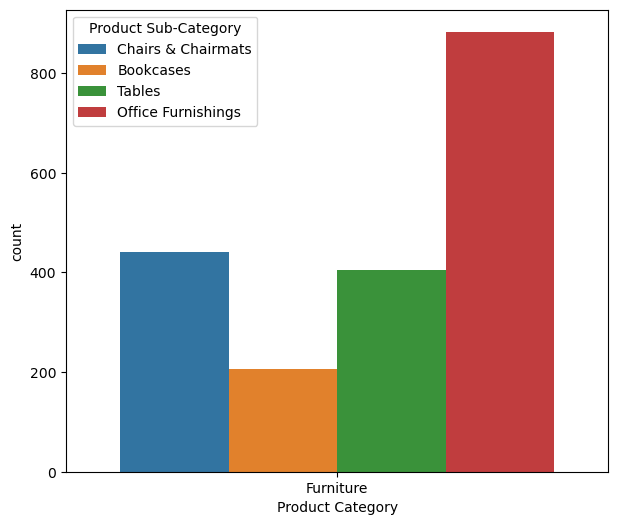

In [21]:
plt.figure(figsize=(7,6))
sns.countplot(x='Product Category', hue = 'Product Sub-Category', data = df[df['Product Category'] == 'Furniture'])
plt.show()

In [22]:
# We will check data by years
df['Order Year'] = df['Order Date'].dt.year

In [23]:
df['Order Year']

0       2012
1       2010
2       2011
3       2011
4       2011
        ... 
9421    2013
9422    2013
9423    2013
9424    2010
9425    2013
Name: Order Year, Length: 9426, dtype: int32

In [24]:
df['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

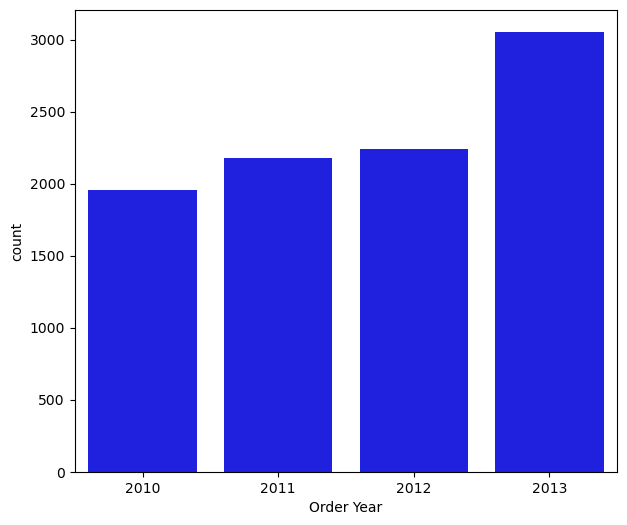

In [25]:
plt.figure(figsize=(7,6))
sns.countplot(x='Order Year', data = df, color = 'blue')
plt.show()

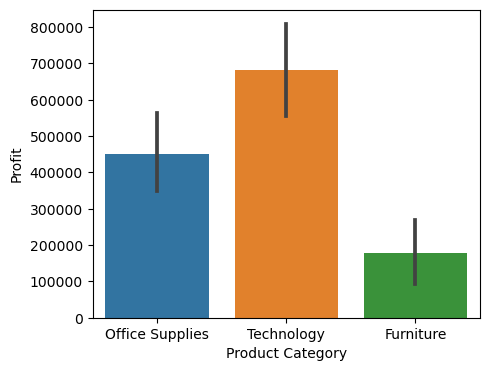

In [26]:
plt.figure(figsize=(5,4))
sns.barplot(x='Product Category', y = 'Profit', data = df, estimator='sum')
plt.show()

In [27]:
df.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Order Year
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525,2012
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522,2010


In [28]:
#  Finding the top 5 State sales
df['State or Province'].value_counts().head(5)
#or df['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

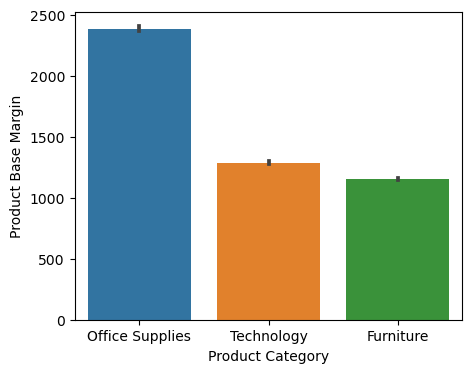

In [29]:
plt.figure(figsize=(5,4))
sns.barplot(x='Product Category', y = 'Product Base Margin', data = df, estimator='sum')
plt.show()